In [1]:
from time import time
from loreal_poc.dataloaders.loaders import DataLoader300W
from loreal_poc.dataloaders.wrappers import CroppedDataLoader, CachedDataLoader
from loreal_poc.marks.facial_parts import FacialParts
from loreal_poc.visualisation.draw import draw_marks
from loreal_poc.tests.performance import *
from loreal_poc.marks.utils import compute_d_outers
from loreal_poc.models.base import PredictionResult
import numpy as np

In [2]:
ds = DataLoader300W(dir_path="300W/sample", batch_size=2)

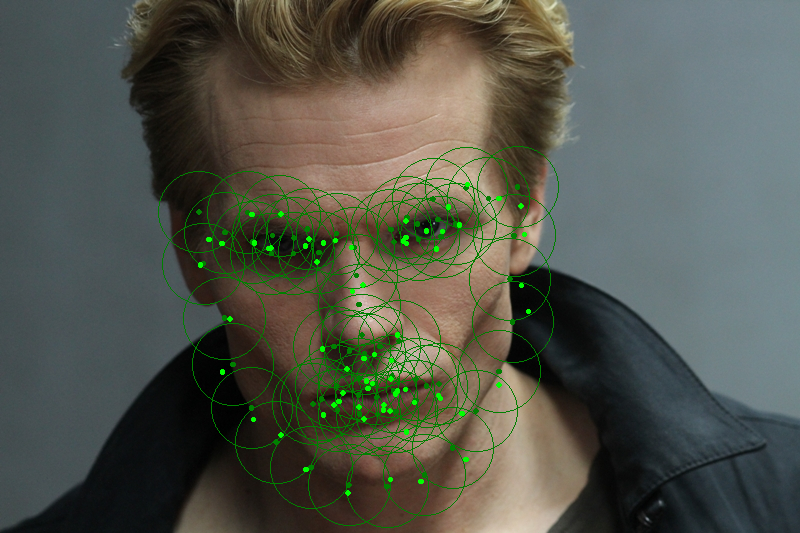

In [10]:
img_idx = 1
image, marks, meta = next(iter(ds))
noisy_marks = marks + 7 * np.random.randn(*marks.shape)

noisy_preds = PredictionResult(noisy_marks)


radius_limit = 0.2
d_outers = compute_d_outers(marks)
noisy_marks[:, ::2] += 0.05 * d_outers
failed_nerfs = NERFMarks.get(noisy_preds, marks, radius_limit=radius_limit)
colors_marks = ["red" if nerf else "green" for nerf in failed_nerfs[img_idx]]
colors_preds = [(255, 127, 0) if nerf else (0, 255, 0) for nerf in failed_nerfs[img_idx]]
draw_marks(
    image[img_idx],
    [marks[img_idx], noisy_marks[img_idx]],
    [colors_marks, colors_preds],
    [False, False],
    radius_limits=[d_outers[img_idx] * radius_limit, None],
)

In [44]:
NMEMean.get(noisy_preds, marks), NMEStd.get(noisy_preds, marks)

(0.2536931120205639, 0.05464654902258227)

In [45]:
NMEs.get(noisy_preds, marks)

array([0.30833966, 0.19904656])

In [46]:
NEs.get(noisy_preds, marks)

array([[0.57547286, 0.10242513, 0.57590778, 0.03235236, 0.43666643,
        0.06449933, 0.5283317 , 0.0263314 , 0.54562259, 0.10512996,
        0.55802198, 0.07069684, 0.40595673, 0.16015804, 0.69790594,
        0.04327851, 0.6032539 , 0.07020105, 0.605353  , 0.03250974,
        0.51200617, 0.03831929, 0.58830047, 0.11266204, 0.58010293,
        0.05407527, 0.54808625, 0.10720193, 0.50476917, 0.08701708,
        0.47354411, 0.02952013, 0.66950366, 0.07710068, 0.45033842,
        0.03035659, 0.47415951, 0.08722071, 0.50865606, 0.05041791,
        0.51380058, 0.12880834, 0.51392883, 0.04325386, 0.52817172,
        0.02555035, 0.52729235, 0.17208974, 0.60564055, 0.08015445,
        0.56858483, 0.15529016, 0.49609724, 0.02352705, 0.5054159 ,
        0.09058545, 0.49990751, 0.11244529, 0.56593785, 0.12824734,
        0.43234867, 0.14031412, 0.55407982, 0.10074916, 0.56801014,
        0.03802677, 0.50090577, 0.12449945],
       [0.27716588, 0.01434157, 0.34810129, 0.06636136, 0.28130896,
   

In [52]:
NERFMarks.get(noisy_preds, marks, radius_limit=0.05)

array([[1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1.],
       [1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
        1., 0., 1., 0.]])

In [54]:
NERFImages.get(noisy_preds, marks, radius_limit=0.05, failed_mark_ratio=0.1)

1.0

In [56]:
NERFImages.get(noisy_preds, marks, radius_limit=0.5, failed_mark_ratio=0.1)

0.5

In [58]:
NERFImages.get(noisy_preds, marks, radius_limit=0.05, failed_mark_ratio=0.7)

0.5

In [9]:
NERFMarksMean.get(noisy_preds, marks, radius_limit=0.05)

array([0.88235294, 0.67647059])